In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import requests
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

In [3]:
ret = requests.get('https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1405699200&end=9999999999&period=86400')

In [4]:
ret

<Response [200]>

In [8]:
df = pd.DataFrame(ret.json())

In [9]:
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424304000,244.000,225.00,225.000000,244.00,46.276313,0.193117,239.627778
1,1424390400,245.000,240.25,240.250118,240.25,55.894897,0.230429,242.568479
2,1424476800,245.000,245.00,245.000000,245.00,14.722239,0.060091,245.000000
3,1424563200,249.000,235.00,245.000000,235.00,129.121248,0.539055,239.532608
4,1424649600,235.001,235.00,235.000002,235.00,96.567562,0.410926,235.000062


In [14]:
scaler = MinMaxScaler()
price = scaler.fit_transform(df)[:,4]

In [16]:
price = list(price)

In [ ]:
price

In [19]:
# x = [[1~5일], [7~11일], [13~17일], [19~23일], ...]
# y = [6일, 12일, 18일, 24일, ...]

window_size = 10
X = []
Y = []

for i in range(len(price)- window_size):
  X.append([price[i+j] for j in range(window_size)])
  Y.append(price[window_size + i])

In [20]:
X = np.array(X)
Y = np.array(Y)

In [21]:
X.shape

(2579, 10)

In [22]:
Y.shape

(2579,)

In [23]:
train_test_split = 2000

x_train = X[:2000]
y_train = Y[:2000]
x_test = X[2000:]
y_test = Y[2000:]

In [24]:
x_train.shape

(2000, 10)

In [25]:
y_train.shape

(2000,)

In [27]:
# 3차원입력 : (n_sample, time_steps, n_features)

x_train = np.reshape(x_train, (2000, 10, 1))
x_test = np.reshape(x_test, (579, 10, 1))

In [28]:
x_train.shape

(2000, 10, 1)

In [30]:
model = Sequential()
model.add(LSTM(100, input_shape=(10,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mse', optimizer='adam')

In [33]:
model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
200/200 [==============================] - 8s 14ms/step - loss: 3.6993e-04 - val_loss: 0.0030
Epoch 2/20
200/200 [==============================] - 2s 8ms/step - loss: 1.1443e-04 - val_loss: 0.0025
Epoch 3/20
200/200 [==============================] - 1s 7ms/step - loss: 9.0224e-05 - val_loss: 0.0029
Epoch 4/20
200/200 [==============================] - 1s 6ms/step - loss: 8.8751e-05 - val_loss: 0.0069
Epoch 5/20
200/200 [==============================] - 1s 7ms/step - loss: 7.7159e-05 - val_loss: 0.0029
Epoch 6/20
200/200 [==============================] - 1s 6ms/step - loss: 8.0369e-05 - val_loss: 0.0041
Epoch 7/20
200/200 [==============================] - 1s 7ms/step - loss: 7.5445e-05 - val_loss: 0.0033
Epoch 8/20
200/200 [==============================] - 2s 8ms/step - loss: 5.8296e-05 - val_loss: 0.0037
Epoch 9/20
200/200 [==============================] - 2s 8ms/step - loss: 6.5323e-05 - val_loss: 0.0041
Epoch 10/20
200/200 [==============================] - 2s 7ms/s

In [34]:
x_train_pred = model.predict(x_train)
x_test_pred = model.predict(x_test)

In [ ]:
x_train_pred

In [ ]:
x_test_pred

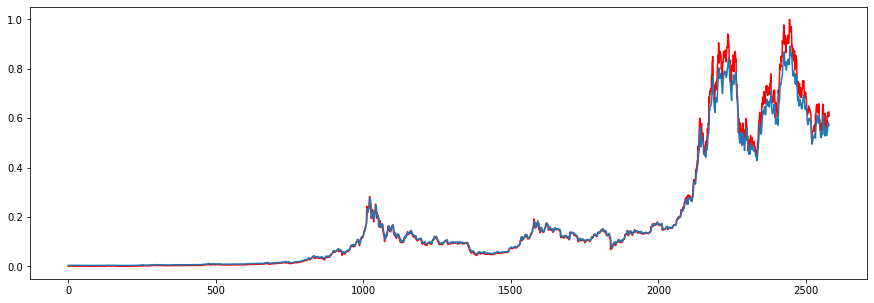

In [63]:
plt.figure(figsize=(15,5))

plt.plot(np.concatenate((y_train, y_test), axis=0), c='r')
plt.plot(np.concatenate((x_train_pred, x_test_pred), axis=0))

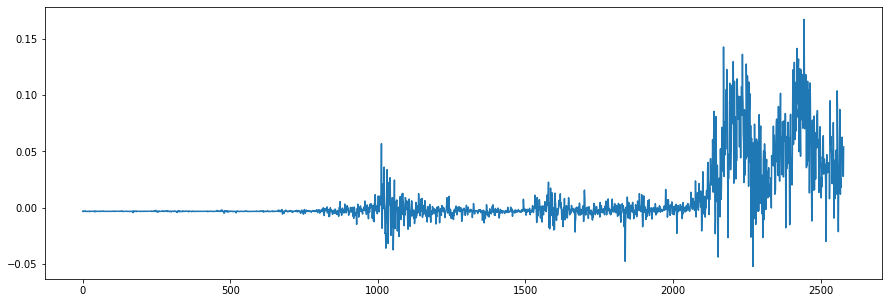

In [85]:
plt.figure(figsize=(15,5))
plt.plot(np.concatenate((y_train, y_test), axis=0) - np.concatenate((x_train_pred, x_test_pred), axis=0)[:,0])

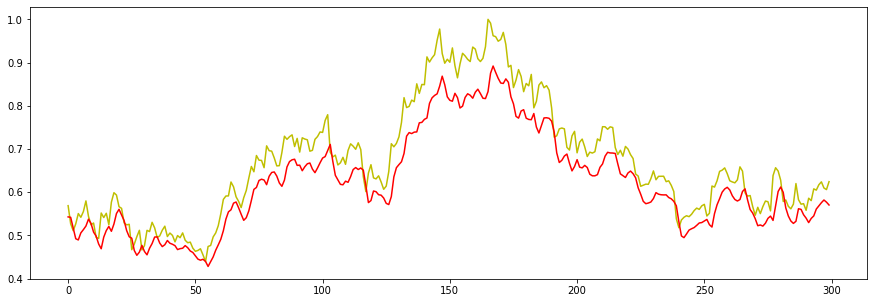

In [62]:
plt.figure(figsize=(15,5))

plt.plot(price[-300:], c='y')
plt.plot(x_test_pred[-300:], c='r')